<h1 style="text-align: center;">Discrete Convolution</h1>
<p style="text-align: center;">Lab 3</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with convolution and its properties using Python.

### 2. Deliverables Overview 
##### Part 1
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**, **Task 3**, and **Task 4**.  
[ ] Code and plots for **Task 5**.

### 3. Part 1
##### 3.1 Purpose
Use the step and ramp functions developed in **Lab 2** to write functions to use in the rest of this lab.
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$f_1(t) = u(t - 2) - u(t - 9)$$  
$$f_2(t) = e^{-t}u(t)$$  
$$f_3(t) = r(t - 2)[u(t - 2) - u(t - 3)] + r(4 - t)[u(t - 3) - u(t - 4)]$$

In [1]:
# Include all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgl

In [2]:
# Insert code for functions f1, f2, and f3 here. Remember to include descriptions of each funtion including inputs and outputs

def stepF(t):
    '''
    Step Function u(t)

    Input: t - time vector

    Output: Returns 1 for t >= 0, 0 for t < 0
    '''
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] >= 0:
            y[i] = 1
        else:
            y[i] = 0
    return y
    
def rampF(t):
    '''
    Ramp Function r(t)

    Input: t - time vector

    Output: Returns t for t >= 0, 0 for t < 0
    '''
    y=np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] >= 0:
            y[i] = t[i]
        else:
            y[i] = 0
    return y

def func1(t):
    '''
    f1(t): A 7s rectangular pulse beginning at t=2s
    
    Input: t - time vector
    
    Output: u(t-2) - u(t-9)
    '''
    return stepF(t-2) - stepF(t-9)

def func2(t):
    '''
    f2(t): A an exponential decay beginning at t=0s 
    
    Input: t - time vector
    
    Output: exp(-t)*u(t)
    '''
    return np.exp(-t) * stepF(t)

def func3(t):
    '''
    f3(t): A 2s triangular pulse beginning at t=2s
    
    Input: t - time vector
    
    Output: r(t-2)*[(u(t-2)-u(t-3)] + r(4-t)*[u(t-3)-u(t-4)]
    '''
    return rampF(t-2)*(stepF(t-2) - stepF(t-3)) + rampF(4-t)*(stepF(t-3) - stepF(t-4))

2. Plot the three functions in a single figure, seperate subplots, from $0 \le t \le 20$ s with time steps small enough to achieve appropriate resolution.

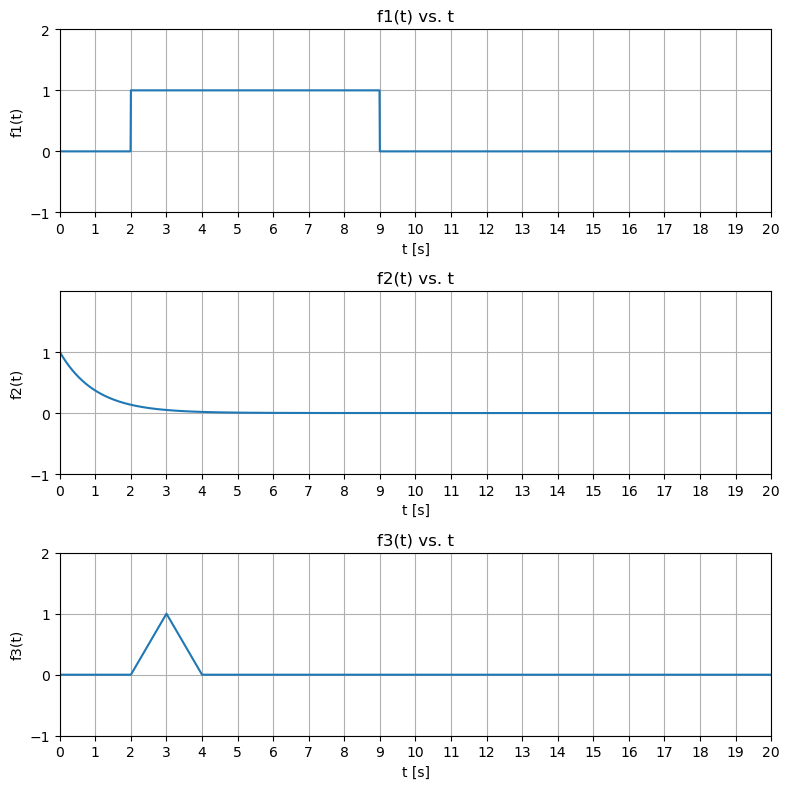

In [3]:
# Insert code to call each function and plot them all in one figure, three subplots, here

step = 1e-2
t = np.arange(0, 20 + step, step) 
y = func1(t)

plt.figure(figsize=(8,8))
plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.grid()
plt.ylabel("f1(t)")
plt.xlabel("t [s]")
plt.title("f1(t) vs. t")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])

y = func2(t)

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("f2(t)")
plt.xlabel("t [s]")
plt.title("f2(t) vs. t")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])

y =  func3(t)

plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.grid()
plt.ylabel("f3(t)")
plt.xlabel("t [s]")
plt.title("f3(t) vs. t")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Create code to perform the convolution of two functions. Verify this code with Python's built-in convolution tools.
##### 4.2 Tasks
1. Write your own code to perform convolution. Describe the functionality of your code thoroughly in the function description and using comments where appropriate. *Note: Recall that the duration of a convolution is the sum of the duration of each function convolved. Adjust your plot window sizes and time vectors appropriately. Hint: You will not have to use the numpy integrate function, think back to how you first learned integrals.

In [4]:
# Insert code for your convolution function here
def convolveF(f, g, t, step):
    '''
    ConvolveF: Performs convolution of input functions f(t) and g(t)

    Inputs:
    f - Array of values from f(t)
    g - Array of values from g(t)
    t - Time vector
    step - Time step size

    Output:
    y - Convolution of f(t) and g(t) | (f * g)(t)
    t_conv - Time vector of convolution
    
    '''
    # Convolution interval length
    len_conv = len(f) + len(g) - 1
    
    #match length of function arrays
    f_ex = np.append(f, np.zeros((1,len(g))))
    g_ex = np.append(g, np.zeros((1,len(f))))
    
    #match new y to input function dimensions                 
    y = np.zeros(f_ex.shape)
    
    # New t interval for convolution where:
    # 0 is the beginning of the interval t
    # len(y)*step is len(y) number of steps
    t_conv = np.arange(0, len(y) * step, step)
    
    #Iterate through each point of the convolution interval
    for i in range(len_conv):
        #Sum at each iteration should begin at 0
        sum = 0
        #Iterate through each point of function f to evaluate areas of overlap between f and g at i 
        for j in range(len(f)):
            #check boundaries for:
            # i - j >= 0 : negative index
            # i - j < len(g) : index beyond possible overlap at that point of convolution
            if (i - j >= 0) and (i - j < len(g)):
                #Sum the area of each overlap slice
                sum += f_ex[j] * g_ex[i-j]
        # Store area as step % of that interval, or "dt" of that interval
        y[i] = sum * step
    # return convolution and new time interval
    return y, t_conv


2. Plot the convolution of $f_1$ and $f_2$.

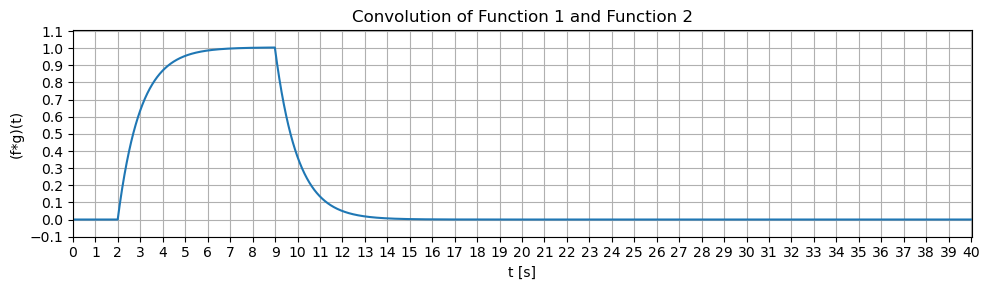

In [5]:
# Insert code to plot the appropriate convolution here
step = 1e-2
t = np.arange(0, 20 + step, step)

f = func1(t)
g = func2(t)

y, t_tot = convolveF(f, g, t, step)
plt.figure(figsize=(10,3))
plt.plot(t_tot, y)
plt.grid()
plt.ylabel("(f*g)(t)")
plt.xlabel("t [s]")
plt.title("Convolution of Function 1 and Function 2")
plt.xticks(np.arange(min(t_tot), max(t_tot) + 1, 1)) #set xtick occurrences
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
plt.axis([min(t_tot), max(t_tot), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])
plt.tight_layout()
plt.show()

3. Plot the convolution of $f_2$ and $f_3$.

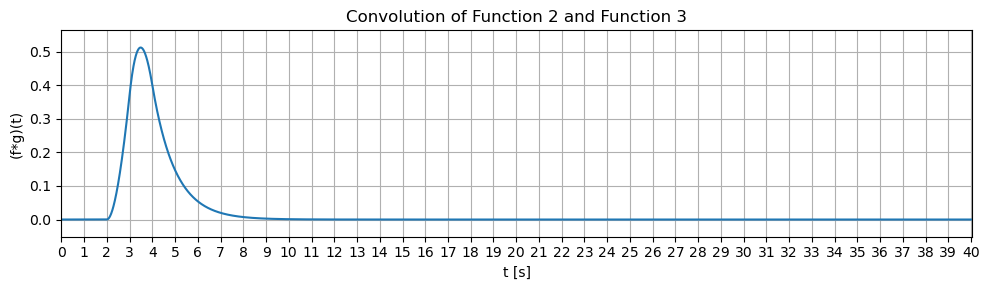

In [6]:
# Insert code to plot the appropriate convolution here
step = 1e-2
t = np.arange(0, 20 + step, step)

f = func2(t)
g = func3(t)

y, t_tot = convolveF(f, g, t, step)
plt.figure(figsize=(10,3))
plt.plot(t_tot, y)
plt.grid()
plt.ylabel("(f*g)(t)")
plt.xlabel("t [s]")
plt.title("Convolution of Function 2 and Function 3")
plt.xticks(np.arange(min(t_tot), max(t_tot) + 1, 1)) #set xtick occurrences
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
plt.axis([min(t_tot), max(t_tot), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])
plt.tight_layout()
plt.show()

4. Plot the convolution of $f_1$ and $f_3$.

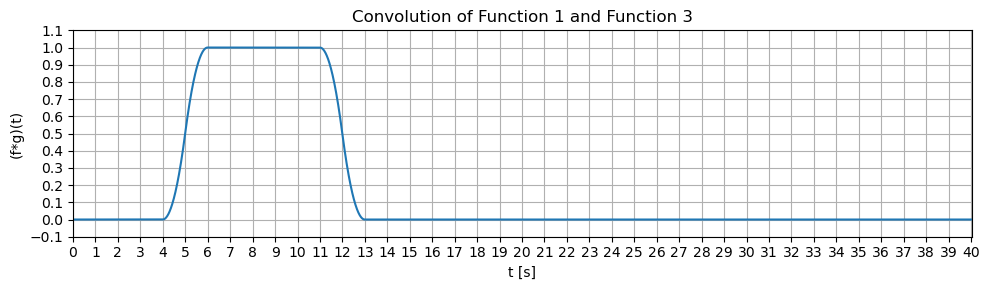

In [7]:
# Insert code to plot the appropriate convolution here
step = 1e-2
t = np.arange(0, 20 + step, step)

f = func1(t)
g = func3(t)

y, t_tot = convolveF(f, g, t, step)
plt.figure(figsize=(10,3))
plt.plot(t_tot, y)
plt.grid()
plt.ylabel("(f*g)(t)")
plt.xlabel("t [s]")
plt.title("Convolution of Function 1 and Function 3")
plt.xticks(np.arange(min(t_tot), max(t_tot) + 1, 1)) #set xtick occurrences
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
plt.axis([min(t_tot), max(t_tot), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])
plt.tight_layout()
plt.show()

5. Verify your convolution function is working correctly using the **scipy.signal.convolve()** function by plotting the convolutions from **Task 2**, **Task 3**, and **Task 4** in one figure with three subplots.

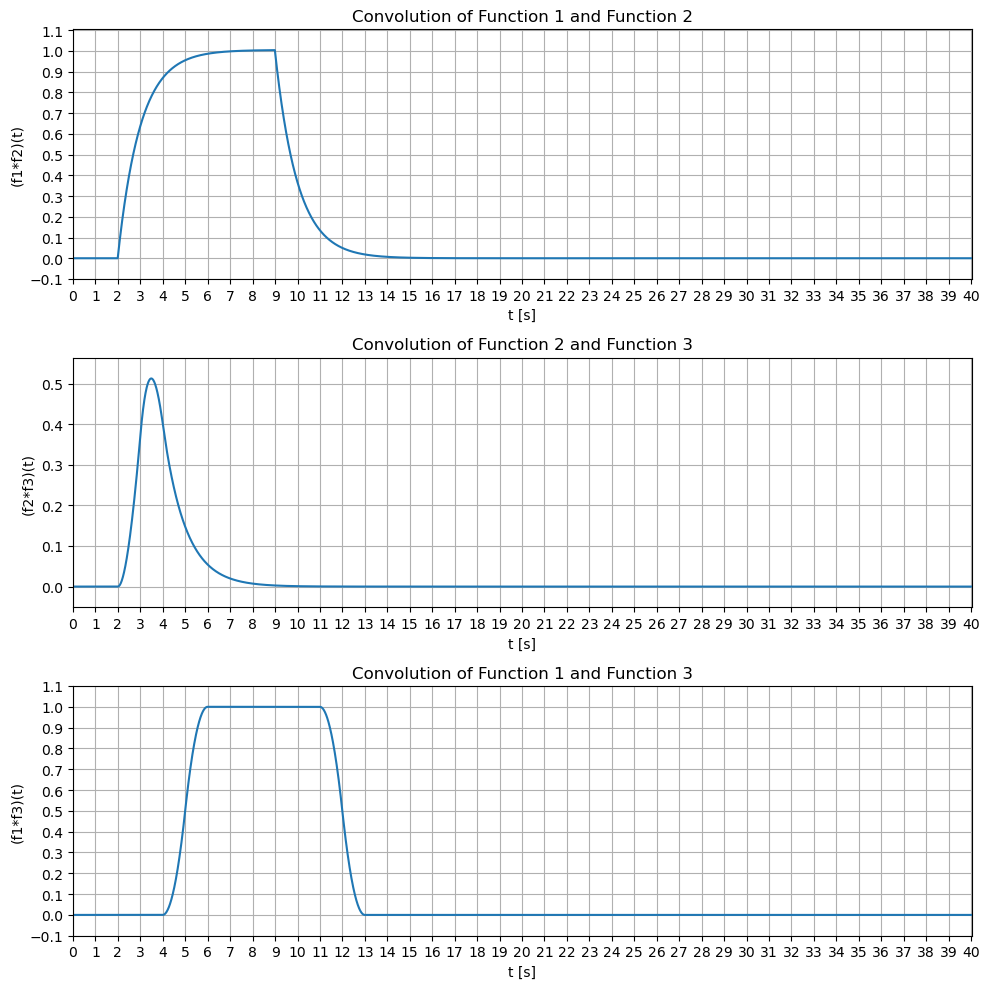

In [8]:
# Insert code using sig.convolve() to plot the convolutions from task 2, 3, and 4 in one figure with three subplots here.
step = 1e-2
t = np.arange(0, 20 + step, step)

f1 = func1(t)
f2 = func2(t)
f3 = func3(t)


y = sgl.convolve(f1, f2) * step
t_tot = np.arange(0, len(y)*step, step)

plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.plot(t_tot, y)
plt.grid()
plt.ylabel("(f1*f2)(t)")
plt.xlabel("t [s]")
plt.title("Convolution of Function 1 and Function 2")
plt.xticks(np.arange(min(t_tot), max(t_tot) + 1, 1)) #set xtick occurrences
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
plt.axis([min(t_tot), max(t_tot), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])

y = sgl.convolve(f2, f3) * step
t_tot = np.arange(0, len(y)*step, step)

plt.subplot(3, 1, 2)
plt.plot(t_tot, y)
plt.grid()
plt.ylabel("(f2*f3)(t)")
plt.xlabel("t [s]")
plt.title("Convolution of Function 2 and Function 3")
plt.xticks(np.arange(min(t_tot), max(t_tot) + 1, 1)) #set xtick occurrences
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
plt.axis([min(t_tot), max(t_tot), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])

y = sgl.convolve(f1, f3) * step
t_tot = np.arange(0, len(y)*step, step)

plt.subplot(3, 1, 3)
plt.plot(t_tot, y)
plt.grid()
plt.ylabel("(f1*f3)(t)")
plt.xlabel("t [s]")
plt.title("Convolution of Function 1 and Function 3")
plt.xticks(np.arange(min(t_tot), max(t_tot) + 1, 1)) #set xtick occurrences
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
plt.axis([min(t_tot), max(t_tot), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])
plt.tight_layout()
plt.show()

### 5. Questions
1. Did you work alone or with classmates on this lab? If you collaborated to get to the solution, what did that process look like?    
>I worked alone on this lab with the majority of work put into researching convolutions upon reaching Part 2.1. [This page](https://betterexplained.com/articles/intuitive-convolution/) covering convolution, provided by BetterExplained, was the primary source used for reasoning through the operations I'd be applying to each array. I understood convolution graphically before this lab but required further resources to explain the components of its mathematical representation.
2. What was the most difficult part of this lab for you, and what did your problem-solving process look like? 
> The most difficult part was implementing the step-by-step behavior of a convolution as one array sliding over another. My process for implementing the behavior utilized a variation of ["rubber duck debugging"](https://ubisglobal.com/blog/get-a-rubber-duck-how-to-make-your-study-time-more-effective/) and is what resulted in the comments throughout most of the function. Any idea I had for implementation required I explain (in comments) what behavior of the convolution the code was intended to mimick. This process helped alleviate the trial-and-error process I tend to fall back on where I'll use minor changes in a solution to experimentally find its effects on the output.
3. Did you approach writing the code with analytical or graphical convolution in mind? Why did you chose this approach?
> I approached writing the code with graphical convolution in mind as my understanding of convolution is primarily through visualization (i.e. a reversed plot of one function sliding over another). It is easier for me to extend this behavior to arrays and build code that supports it than to translate the mathematical process to operations on the arrays.  
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>The instructions for lab 3 were well explained and the addition of "think back to how you first learned integrals" provided a good starting point for understanding how the function should be implemented.